In [190]:
import numpy as np
import pandas as pd
import requests
import io
from scipy import optimize
import matplotlib.pyplot as plt
import requests, pandas as pd
from bs4 import BeautifulSoup
import urllib.request
import altair as alt

ModuleNotFoundError: No module named 'altair'

In [37]:
density = pd.read_csv(r'C:\Users\vw191\OneDrive\Documents\GitHub\107SBakst.github.io\data\eu_density_data_with_area.csv')
density

,Unnamed: 0,City,Country,boundary_code,area_km2,population_2015,CityCountry,pop_density_15
0,0,Honolulu,United States,1,185,512853.66670,HonoluluUnitedStates,2772.181982
1,1,Papeete,French Polynesia,1,42,91521.12460,PapeeteFrenchPolynesia,2179.074395
2,2,Santa Maria,United States,1,55,123181.28480,SantaMariaUnitedStates,2239.659724
3,3,Monterey,United States,1,48,67772.28886,MontereyUnitedStates,1411.922685
4,4,Santa Barbara,United States,1,60,114753.15020,SantaBarbaraUnitedStates,1912.552503
...,...,...,...,...,...,...,...,...
12970,13130,Tauranga,New Zealand,1,70,84583.72438,TaurangaNewZealand,1208.338920
12971,13131,Buin,Papua New Guinea,1,3,65360.36914,BuinPapuaNewGuinea,21786.789713
12972,13132,Honiara,Solomon Islands,1,23,73669.68423,HoniaraSolomonIslands,3203.029749
12973,13133,Nouméa,New Caledonia,1,27,70631.79630,NouméaNewCaledonia,2615.992456


OECD population dataset https://stats.oecd.org/Index.aspx?DataSetCode=CITIES 

In [201]:
oecd_pop = pd.read_csv(r'C:\Users\vw191\OneDrive - University of Bristol\Course\3rd year\Data Science\Project\Chart_2_Innovation\OECD_metro_pop.csv')
oecd_pop = oecd_pop.drop(columns=['Reference Period Code', 'Reference Period', 'Flag Codes', 'Flags'])

oecd_pop['Metropolitan areas'] = oecd_pop['Metropolitan areas'].str.replace(' (Greater)', '')
oecd_density = oecd_pop[oecd_pop['Variables'] == 'Population density (inhabitants per km2)']
oecd_density_us = oecd_density[oecd_density['METRO_ID'].str.contains("USA")]
oecd_density_21 = oecd_pop[oecd_pop['Year'] == 2021]
oecd_density_21 = oecd_density_21[oecd_density_21['Variables'] == 'Population density (inhabitants per km2)']
oecd_density_21

,METRO_ID,Metropolitan areas,VAR,Variables,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,Value
360,COL20,Popayan,POP_DEN,Population density (inhabitants per km2),2021,2021,PER,Persons,0,Units,675.0
586,DK003,Odense,POP_DEN,Population density (inhabitants per km2),2021,2021,PER,Persons,0,Units,161.0
1632,SE002,Gothenburg,POP_DEN,Population density (inhabitants per km2),2021,2021,PER,Persons,0,Units,250.0
1934,NO004,Stavanger,POP_DEN,Population density (inhabitants per km2),2021,2021,PER,Persons,0,Units,124.0
2130,COL03,Cali,POP_DEN,Population density (inhabitants per km2),2021,2021,PER,Persons,0,Units,1611.0
...,...,...,...,...,...,...,...,...,...,...,...
38056,NO002,Bergen,POP_DEN,Population density (inhabitants per km2),2021,2021,PER,Persons,0,Units,128.0
59909,IT501,Messina,POP_DEN,Population density (inhabitants per km2),2021,2021,PER,Persons,0,Units,770.0
69058,AT006,Klagenfurt,POP_DEN,Population density (inhabitants per km2),2021,2021,PER,Persons,0,Units,109.0
69199,COL25,Riohacha,POP_DEN,Population density (inhabitants per km2),2021,2021,PER,Persons,0,Units,67.0


In [6]:
#Global innovation index dataset is from this website. This is data for 2021
#https://innovation-cities.com/indexes

In [33]:
    with open(r'C:\Users\vw191\OneDrive - University of Bristol\Course\3rd year\Data Science\Project\Chart_2_Innovation\INNOVATION_CITIES_INDESX_2021_PREVIEW_2THINKNOW.csv') as f:
        print(f.encoding)

cp1252


In [34]:
global_innovation_index = pd.read_csv(r'C:\Users\vw191\OneDrive - University of Bristol\Course\3rd year\Data Science\Project\Chart_2_Innovation\INNOVATION_CITIES_INDESX_2021_PREVIEW_2THINKNOW.csv', encoding = "cp1252")

In [36]:
global_innovation_index

,2021 Ranking,City,GEOGRAPHY,STATE/PROVINCE,REGION,BLOC,City ID,Current City Classification*,Current Score,Cultural Assets,Human Infrastructure,Networked Markets,Previous 2019 Ranking,Change Since 2019,Pre-Covid 5 Year Average Ranking,Post-COVID 5 year Result
0,-5,Tokyo,Japan,Tokyo,ASIA,JAPAN,1361,NEXUS,56,18,20,18,2,+ 7,4,+ 9
1,-4,Boston,United States,Massachusetts,AMERICAS,USA,167,NEXUS,56,18,19,19,8,+ 12,6,+ 10
2,-3,New York,United States,New York,AMERICAS,USA,901,NEXUS,54,17,17,20,1,+ 4,3,+ 6
3,-2,Sydney,Australia,NSW,ASIA,ANZ,1300,NEXUS,53,19,16,18,15,+ 17,14,+ 16
4,-1,Singapore,Singapore,Singapore,ASIA,ASIA,1240,NEXUS,53,18,17,18,5,+ 6,7,+ 8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,490,Zaporozhye,Ukraine,Zaporizhia Oblast,EMERGING,EURASIA,1518,NaN,27,11,9,7,485,- 5,472,- 18
496,491,Douala,Cameroon,Cameroon Littoral Region,EMERGING,AFRICA,350,NaN,27,10,8,9,495,+ 4,496,+ 5
497,492,Madurai,India,Tamil Nadu,ASIA,INDIA,1545,NaN,27,11,8,8,466,- 26,454,- 38
498,493,La Paz,Bolivia,La Paz Department,AMERICAS,LATIN AMERICA,702,NaN,26,10,7,9,472,- 21,479,- 14


In [202]:
merged_density_innovation = pd.merge(global_innovation_index, oecd_density_21, left_on=['City'], right_on=['Metropolitan areas'])
merged_density_innovation

,2021 Ranking,City,GEOGRAPHY,STATE/PROVINCE,REGION,BLOC,City ID,Current City Classification*,Current Score,Cultural Assets,...,Metropolitan areas,VAR,Variables,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,Value
0,10,Stockholm,Sweden,NaN,EUROPE,EUROPE,1279,NEXUS,50,16,...,Stockholm,POP_DEN,Population density (inhabitants per km2),2021,2021,PER,Persons,0,Units,340.0
1,16,Vienna,Austria,Vienna,EUROPE,EUROPE,1439,NEXUS,49,18,...,Vienna,POP_DEN,Population density (inhabitants per km2),2021,2021,PER,Persons,0,Units,314.0
2,19,Oslo,Norway,NaN,EUROPE,EUROPE,978,NEXUS,49,17,...,Oslo,POP_DEN,Population density (inhabitants per km2),2021,2021,PER,Persons,0,Units,194.0
3,35,Helsinki,Finland,NaN,EUROPE,EUROPE,497,HUB,47,17,...,Helsinki,POP_DEN,Population density (inhabitants per km2),2021,2021,PER,Persons,0,Units,329.0
4,48,Copenhagen,Denmark,NaN,EUROPE,EUROPE,302,HUB,46,16,...,Copenhagen,POP_DEN,Population density (inhabitants per km2),2021,2021,PER,Persons,0,Units,605.0
5,57,Milan,Italy,NaN,EUROPE,EUROPE,825,HUB,45,16,...,Milan,POP_DEN,Population density (inhabitants per km2),2021,2021,PER,Persons,0,Units,1594.0
6,87,Rome,Italy,NaN,EUROPE,EUROPE,1117,HUB,44,17,...,Rome,POP_DEN,Population density (inhabitants per km2),2021,2021,PER,Persons,0,Units,698.0
7,102,Gothenburg,Sweden,NaN,EUROPE,EUROPE,453,NODE,44,15,...,Gothenburg,POP_DEN,Population density (inhabitants per km2),2021,2021,PER,Persons,0,Units,250.0
8,120,Brussels,Belgium,Brussels,EUROPE,EUROPE,190,NODE,43,15,...,Brussels,POP_DEN,Population density (inhabitants per km2),2021,2021,PER,Persons,0,Units,689.0
9,158,Basel,Switzerland,NaN,EUROPE,EUROPE,1538,NODE,42,14,...,Basel,POP_DEN,Population density (inhabitants per km2),2021,2021,PER,Persons,0,Units,801.0


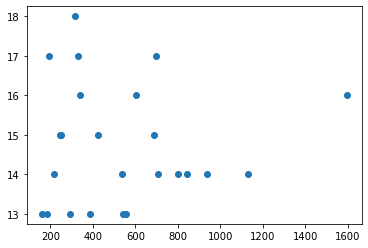

In [212]:
x = merged_density_innovation['Value'][merged_density_innovation['BLOC'] == 'EUROPE']
y = merged_density_innovation['Cultural Assets'][merged_density_innovation['BLOC'] == 'EUROPE']
merged_density_innovation['REGION'] = pd.Categorical(merged_density_innovation['REGION']).codes
fig = plt.figure(111)
ax = fig.add_subplot(111)
ax.scatter(x, y)
plt.show()


USPTO dataset of cities of patents overtime

In [116]:

USPTO_patent_dataset = pd.read_csv(r'C:\Users\vw191\OneDrive - University of Bristol\Course\3rd year\Data Science\Project\Chart_2_Innovation\USPTO_patent_dataset.csv')

USPTO_patent_dataset_tr = USPTO_patent_dataset.groupby(by=['inventor_city', 'patent_year', 'inventor_country'], as_index=False).count()
USPTO_patent_dataset_tr



,inventor_city,patent_year,inventor_country,inventor_id,inventor_key_id,inventor_lastknown_city,inventor_lastknown_state,inventor_state,patent_date,patent_number,patent_title
0,Abbotsford,2005,CA,1,1,1,1,1,1,1,1
1,Aberdeen,1995,US,1,1,1,1,1,1,1,1
2,Adliswil,2014,CH,1,1,1,1,1,1,1,1
3,Agoura Hills,2015,US,2,2,2,2,2,2,2,2
4,Agoura Hills,2017,US,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...
1432,Zurich,2014,CH,1,1,1,1,1,1,1,1
1433,Zurich,2015,CH,4,4,4,4,4,4,4,4
1434,Zurich,2017,CH,1,1,1,1,1,1,1,1
1435,Zwolle,2020,NL,1,1,1,1,1,1,1,1


In [117]:
USPTO_patent_dataset_tr.drop(USPTO_patent_dataset_tr.columns[4:7], axis=1, inplace=True)
USPTO_patent_dataset_tr

,inventor_city,patent_year,inventor_country,inventor_id,inventor_state,patent_date,patent_number,patent_title
0,Abbotsford,2005,CA,1,1,1,1,1
1,Aberdeen,1995,US,1,1,1,1,1
2,Adliswil,2014,CH,1,1,1,1,1
3,Agoura Hills,2015,US,2,2,2,2,2
4,Agoura Hills,2017,US,2,2,2,2,2
...,...,...,...,...,...,...,...,...
1432,Zurich,2014,CH,1,1,1,1,1
1433,Zurich,2015,CH,4,4,4,4,4
1434,Zurich,2017,CH,1,1,1,1,1
1435,Zwolle,2020,NL,1,1,1,1,1


In [171]:

USPTO_patent_dataset_tr = USPTO_patent_dataset_tr.rename(columns={'inventor_city':'city', 'inventor_country':'no.patents'})
merged_USPTO = pd.merge(USPTO_patent_dataset_tr, density, left_on=['city'], right_on=['City'])

In [174]:
oecd_density_us

,METRO_ID,Metropolitan areas,VAR,Variables,TIME,Year,Unit Code,Unit,PowerCode Code,PowerCode,Value
144,USA26,Cuyahoga,POP_DEN,Population density (inhabitants per km2),2000,2000,PER,Persons,0,Units,411.0
145,USA26,Cuyahoga,POP_DEN,Population density (inhabitants per km2),2001,2001,PER,Persons,0,Units,410.0
146,USA26,Cuyahoga,POP_DEN,Population density (inhabitants per km2),2002,2002,PER,Persons,0,Units,408.0
147,USA26,Cuyahoga,POP_DEN,Population density (inhabitants per km2),2003,2003,PER,Persons,0,Units,407.0
148,USA26,Cuyahoga,POP_DEN,Population density (inhabitants per km2),2004,2004,PER,Persons,0,Units,406.0
...,...,...,...,...,...,...,...,...,...,...,...
38073,USA88,Fayette,POP_DEN,Population density (inhabitants per km2),2016,2016,PER,Persons,0,Units,109.0
38074,USA88,Fayette,POP_DEN,Population density (inhabitants per km2),2017,2017,PER,Persons,0,Units,110.0
38075,USA88,Fayette,POP_DEN,Population density (inhabitants per km2),2018,2018,PER,Persons,0,Units,111.0
38076,USA88,Fayette,POP_DEN,Population density (inhabitants per km2),2019,2019,PER,Persons,0,Units,111.0


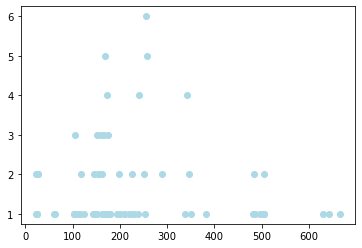

In [176]:
us_density_uspto = pd.merge(USPTO_patent_dataset_tr, oecd_density_us, left_on=['city', 'patent_year'], right_on=['Metropolitan areas', 'Year'])

x2 = us_density_uspto.Value
y2 = us_density_uspto['inventor_id']
fig3 = plt.figure(111)
ax2 = fig3.add_subplot(111)
ax2.scatter(x2, y2, color='lightblue')
plt.show()

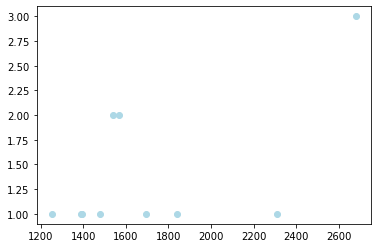

In [138]:
x1 = merged_USPTO.pop_density_15[(merged_USPTO['Country'] == 'United States') & (merged_USPTO['patent_year'] == 2016)]
y1 = merged_USPTO['no.patents'][(merged_USPTO['Country'] == 'United States') & (merged_USPTO['patent_year'] == 2016)]
fig2 = plt.figure(111)
ax1 = fig2.add_subplot(111)
ax1.scatter(x1, y1, color='lightblue')
plt.show()